In [1]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential,model_from_json
from keras.utils.vis_utils import plot_model
from keras.layers import SimpleRNN,Dense,Activation,Conv2D,MaxPool2D,Dropout,Flatten,MaxPooling2D,AveragePooling2D
from tensorflow.keras.optimizers import SGD,Adam
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
path = r"D:\AI\fer2013\fer2013.csv"
data = pd.read_csv(path)
num_of_instances = len(data) #获取数据集的数量
print("数据集的数量为：",num_of_instances)

pixels = data['pixels']
emotions = data['emotion']
usages = data['Usage']

数据集的数量为： 35887


In [3]:
num_classes = 7   #表情的类别数目
x_train,y_train,x_test,y_test = [],[],[],[]

for emotion,img,usage in zip(emotions,pixels,usages):    
    try: 
        emotion = keras.utils.to_categorical(emotion,num_classes)   # 独热向量编码
        val = img.split(" ")
        pixels = np.array(val,'float32')
        
        if(usage == 'Training'):
            x_train.append(pixels)
            y_train.append(emotion)
        elif(usage == 'PublicTest'):
            x_test.append(pixels)
            y_test.append(emotion)
    except:
        print("",end="")

In [4]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = x_train.reshape(-1,48,48,1)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_test = x_test.reshape(-1,48,48,1)

2

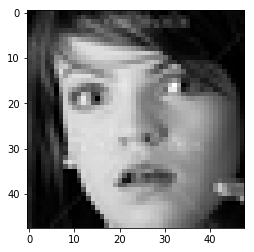

In [5]:
i = np.random.randint(0,len(x_train))
plt.gray()
plt.imshow(x_train[i].reshape([48,48]))
data['emotion'][i]

In [15]:
batch_size = 500
epochs = 30

model = Sequential()

#第一层卷积层
model.add(Conv2D(input_shape=(48,48,1),filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

#第二层卷积层
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

#第三层卷积层
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Flatten())

#全连接层
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(7,activation = 'softmax'))

# #1st convolution layer
# model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
# model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))
 
# #2nd convolution layer
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
 
# #3rd convolution layer
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
 
# model.add(Flatten())
 
# #fully connected neural networks
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(1.0))
# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(1.0))
# model.add(Dense(num_classes, activation='softmax'))

sgd=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

#进行训练
model.compile(loss = 'categorical_crossentropy',optimizer = Adam(),metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test))


train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])
 
test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

model.save('my_model.h5')
# model_json = model.to_json()
# open('my_model_json.json', 'w').write(model_json)
# model.save_weights('my_model_weights.h5')


Train on 28709 samples, validate on 3589 samples
Epoch 1/30
28709/28709 [==============================] - 29s 1ms/step - loss: 2.6478 - acc: 0.2303 - val_loss: 1.7867 - val_acc: 0.2510
Epoch 2/30
28709/28709 [==============================] - 28s 965us/step - loss: 1.7130 - acc: 0.3132 - val_loss: 1.5790 - val_acc: 0.3831
Epoch 3/30
28709/28709 [==============================] - 28s 966us/step - loss: 1.5632 - acc: 0.3956 - val_loss: 1.4960 - val_acc: 0.4129
Epoch 4/30
28709/28709 [==============================] - 28s 967us/step - loss: 1.4696 - acc: 0.4366 - val_loss: 1.4259 - val_acc: 0.4472
Epoch 5/30
28709/28709 [==============================] - 28s 964us/step - loss: 1.3748 - acc: 0.4759 - val_loss: 1.3700 - val_acc: 0.4790
Epoch 6/30
28709/28709 [==============================] - 28s 965us/step - loss: 1.2918 - acc: 0.5088 - val_loss: 1.3131 - val_acc: 0.4915
Epoch 7/30
28709/28709 [==============================] - 28s 966us/step - loss: 1.2260 - acc: 0.5335 - val_loss: 1.265

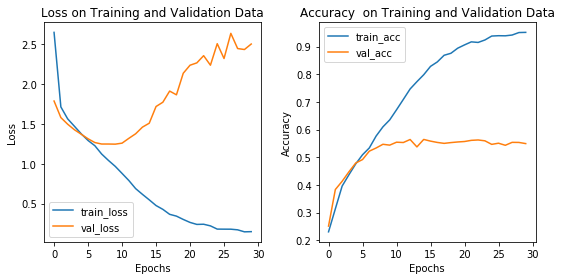

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['acc']
val_acc = history.history['val_acc']
# make a figure
fig = plt.figure(figsize=(8,4))
# subplot loss
ax1 = fig.add_subplot(121)
ax1.plot(loss,label='train_loss')
ax1.plot(val_loss,label='val_loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.set_title('Loss on Training and Validation Data')
ax1.legend()
# subplot acc
ax2 = fig.add_subplot(122)
ax2.plot(acc,label='train_acc')
ax2.plot(val_acc,label='val_acc')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy  on Training and Validation Data')
ax2.legend()
plt.tight_layout()
# plot_model(model,to_file=('model.png'),show_shapes=True,show_layer_names=False,rankdir='TB')
# plt.figure(figsize=(10,10))
# img = plt.imread('model.png')
# plt.axis('off')
# plt.show()